In [28]:
from impact_consumer import export_impact, export_players_impact, export_probability_points, generate_probability_dataframe
from impact_score.json_analyser.api_consumer import get_impact_details
from impact_score.json_analyser.analyse_json import Analyser
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import ticker
import time
import matplotlib.patches as mpatches
a = Analyser()

Analyser created!


In [29]:
match_id = 60206

In [30]:
data = export_probability_points(match_id)["Round_3"]
y_values = data["probability_points"]
x_values = data["timestamp_points"]

In [31]:
df = generate_probability_dataframe(data)
df

,timestamp,probability,label,kill_feed
0,0,0.531489,A,Round Start
1,0,0.531489,None,None
2,8299,0.572944,B,Delz1k Spectre Nivera
3,8299,0.331810,None,None
4,42780,0.349171,C,Jamppi Vandal keznit
5,42780,0.572579,None,None
6,44737,0.572579,D,Jamppi Vandal Klaus
7,44737,0.755173,None,None
8,56215,0.747558,E,Jamppi Vandal Delz1k
9,56215,0.902971,None,None


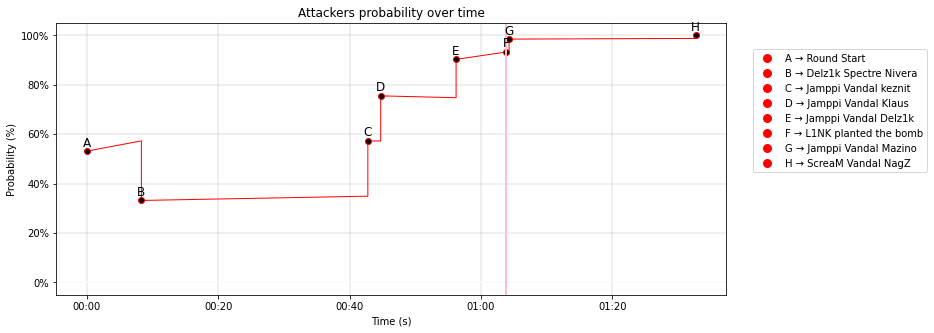

In [27]:
plt.figure(figsize=(12, 5))
plt.title('Attackers probability over time')
plt.xlabel('Time (s)')
plt.ylabel('Probability (%)')
markers_on = list(range(1, len(x_values), 2))
ax = plt.gca()
n = list(df["label"])

for i, txt in enumerate(n):
    if txt is None:
        plt.text(x_values[i], y_values[i]+0.007, n[i-1], horizontalalignment='center', verticalalignment='bottom',
                 fontsize=12)

legend_elements = []

for event in df["kill_feed"]:
    if event is not None:
        label_index = chr(65 + len(legend_elements))
        new_label = f"{label_index} → {event}"
        new_element = Line2D([0], [0], marker='o', color='w', label=new_label, markerfacecolor='r', markersize=10)
        legend_elements.append(new_element)
plt.legend(handles=legend_elements, loc=(1.04,0.45))
plt.grid(linewidth=0.4)

plt.plot(df["timestamp"], df["probability"], color="red", linewidth=1.0,
         marker='o', markersize=6, markerfacecolor="black", markevery=markers_on)

current_values = plt.gca().get_yticks()
plt.axhline(y=0, color='white', linestyle='-')

bomb_query = df[df['kill_feed'].str.contains("bomb")==True]
if len(bomb_query) == 1:
    bomb_stamp = bomb_query["timestamp"].to_list()[0]
    plt.axvline(x=bomb_stamp, color='pink', linestyle='-', linewidth=2.0)

formatter = ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.show()

In [27]:
# Create odd numbers until 16
odd_numbers = list(range(1, len(x_values), 2))
odd_numbers

[1, 3, 5, 7, 9, 11, 13, 15]

In [16]:
#df_row = df.loc[df["kill_feed"].str.contains("bomb")]
df_row = df[df['kill_feed'].str.contains("bomb")==True]["timestamp"].to_list()[0]
df_row

63842

In [22]:
bomb_query = df[df['kill_feed'].str.contains("bomb")==True]
len(bomb_query)

1